In [55]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09.ipynb")

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Lab 9: Time Series
### Using Zillow to Predict CPI
In this notebook, we're going to try to use data from Zillow (specifically, their ZORI index) to see if we can use it to predict the US consumer price index.

---
## Part 1: Introduction and Data Processing

### Dataset 1: ZORI

We've downloaded the ZORI index for you from [Zillow Research Data](https://www.zillow.com/research/data/). Run the following cell to display information about the ZORI index. What can you tell from the data?

In [57]:
zori = pd.read_csv("data/zori1.csv")
zori

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,1370.301806,1381.971304,1392.389090,1403.203509,1408.901384,...,1928.945108,1937.304351,1955.272060,1971.256988,1997.731260,2019.752839,2044.662959,2065.275748,2078.546078,2084.084210
1,394913,1,"New York, NY",msa,NY,2506.196326,2533.311441,2552.989317,2570.501028,2573.663435,...,2957.725252,2984.899451,3032.151836,3082.959790,3142.381057,3201.035347,3258.611614,3308.938574,3327.647323,3321.271717
2,753899,2,"Los Angeles, CA",msa,CA,1977.874325,1990.644815,2004.443160,2016.922137,2031.255505,...,2808.206899,2825.516662,2850.339483,2881.506596,2919.113666,2953.089197,2978.850604,2999.777869,3013.211794,3019.026316
3,394463,3,"Chicago, IL",msa,IL,1478.149264,1490.961012,1502.702134,1528.952557,1535.997197,...,1795.629571,1808.471849,1823.778075,1843.010280,1865.307537,1890.513951,1911.437953,1930.811578,1939.370439,1941.933786
4,394514,4,"Dallas, TX",msa,TX,1180.713035,1191.112125,1202.397600,1209.409429,1216.117716,...,1724.699775,1736.260930,1747.886285,1758.449166,1780.575633,1807.486899,1842.009269,1866.378789,1876.715983,1875.844643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,394322,861,"Altus, OK",msa,OK,404.816596,NaN,417.170690,NaN,NaN,...,NaN,NaN,NaN,735.821384,732.921061,771.810020,755.232683,810.606473,750.000000,821.649685
575,394687,869,"Hood River, OR",msa,OR,NaN,NaN,NaN,708.148593,NaN,...,NaN,2039.794902,NaN,2061.477514,2053.911628,2293.863629,2446.688466,2573.551207,2575.000000,2617.167354
576,394718,892,"Jamestown, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,643.033893,632.188630,NaN,668.388884,715.417127,687.157390,702.818101,729.449277,771.000000,795.646586
577,394330,906,"Andrews, TX",msa,TX,NaN,NaN,480.844237,470.002683,NaN,...,NaN,901.423609,NaN,NaN,NaN,NaN,NaN,NaN,962.000000,1019.826674


<!-- BEGIN QUESTION -->

**Question 1.1:** What information is stored in the ZORI data? What does each row represent?

The ZORI (Zillow Observed Rent Index) dataset contains monthly rent price estimates collected by Zillow across various geographic regions in the United States.

<!-- END QUESTION -->

Below, we select rows within the ZORI dataframe that have the timeseries corresponding to the ZORI index for the entire country.

In [58]:
zUS = zori.iloc[[0], :-1]
zUS

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,1370.301806,1381.971304,1392.38909,1403.203509,1408.901384,...,1915.496408,1928.945108,1937.304351,1955.27206,1971.256988,1997.73126,2019.752839,2044.662959,2065.275748,2078.546078


We notice that the dates in the timeseries actually start from the 6th entry in the index. If we wanted to create a DataFrame, we would need to find a way to extract this information, in addition to the data stored in the ZORI column.

**Question 1.2:** Transpose the dataframe `zUS`, select the relevant columns and convert them into rows (similar to the picture below). Rename the column names to `DATE` and `ZORI`. Ensure the `DATE` column has an appropriate data type. The resulting dataframe `zillow` should look like the following:

*Hint*: `.T` allows us to transpose a dataframe. 

| DATE | ZORI |
| ----------- | ----------- |
| 2015-03-31 | 1370.301806 |
| 2015-04-30 | 1381.971304 |
|  | ... (rows omitted) |

In [59]:
# Hint: consider taking the transpose of `zUS`
zillow = zUS.T 
zillow.reset_index(inplace=True)
zillow.columns = ['DATE', 'ZORI']
zillow = zillow.iloc[5:]
zillow['DATE'] = pd.to_datetime(zillow['DATE'])
zillow

,DATE,ZORI
5,2015-03-31,1370.301806
6,2015-04-30,1381.971304
7,2015-05-31,1392.38909
8,2015-06-30,1403.203509
9,2015-07-31,1408.901384
...,...,...
90,2022-04-30,1997.73126
91,2022-05-31,2019.752839
92,2022-06-30,2044.662959
93,2022-07-31,2065.275748


In [60]:
grader.check("q1_2")

q1_2 results: All test cases passed!

We might wonder what this looks like. Let's graph this time series.

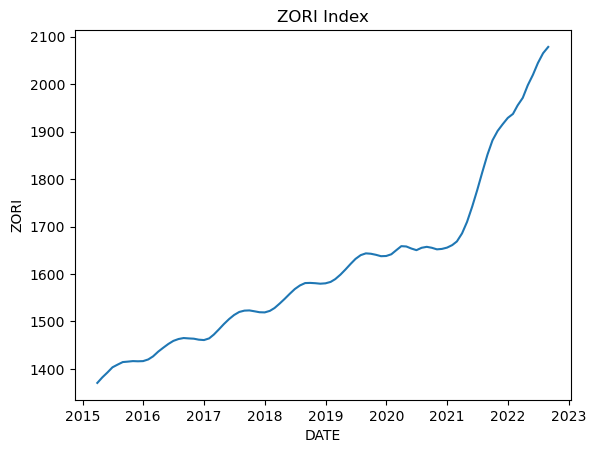

In [61]:
sns.lineplot(data=zillow, x="DATE", y="ZORI")
plt.title("ZORI Index");

Do you notice anything interesting about this graph? 

We'll focus on the part where the slope becomes noticably steeper. Around what time did this happen? What are some possible explanations?

### Dataset 2: US CPI

We'll now turn our attention to the US CPI.

We've downloaded historical **US CPI data for rent of primary residence** from the [FRED website](https://fred.stlouisfed.org/series/CUUR0000SEHA). Since our ZORI data starts on 03/31/2015, we've adjusted the sliders on the FRED website to only extract starting from 03/31/2015. We've also renamed the columns to be more readable.

In [62]:
usCPI = pd.read_csv("data/usCPI.csv")
usCPI = usCPI.rename(columns={"CUUR0000SEHA": "CPI"})
usCPI = usCPI.iloc[1:, :]
usCPI['DATE'] = pd.to_datetime(usCPI['DATE'], format='%Y-%m-%d')
usCPI.head()

,DATE,CPI
1,2015-04-01,283.598
2,2015-05-01,284.245
3,2015-06-01,285.031
4,2015-07-01,286.090
5,2015-08-01,287.068


We can try plotting this to see what it looks like.

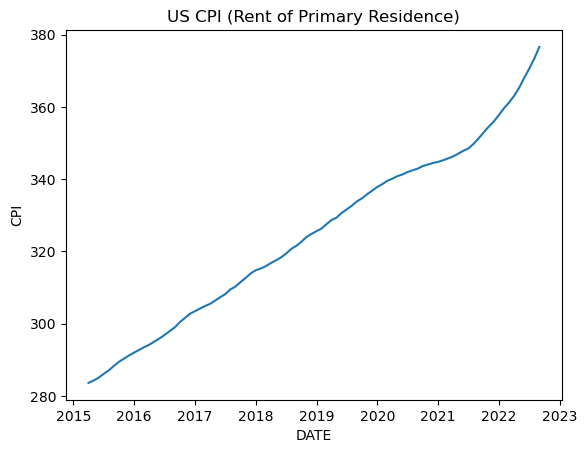

In [63]:
sns.lineplot(data=usCPI, x="DATE", y="CPI")
plt.title("US CPI (Rent of Primary Residence)");

### Data Preprocessing

In [64]:
# set `DATE` as the index
zillow = zillow.set_index('DATE')
usCPI = usCPI.set_index('DATE')

**Question 1.3:** Let's split the `usCPI` dataframe into a training set and testing set. Put all data **before** Jan. 1st, 2022 into the *training set*, and all data **on or after** Jan. 1st, 2022 into the *testing set*. 

Note: This is not how normally we do the train-test split. In a normal setup, we would assign a random portion of the data to training set and the rest to testing set. But in this analysis, we care about how well can we predict the future values using current values, so we'll create a train-test split based on a date. 

*Hint*: You can use `pd.to_datetime("2022-01-01", format='%Y-%m-%d')` to generate a timestamp for comparison. 

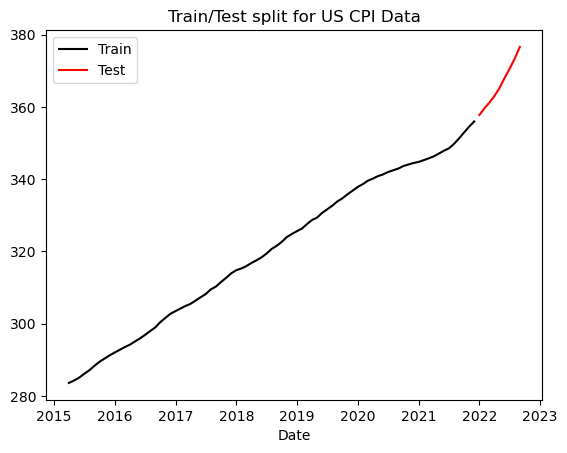

In [65]:
split_date = pd.to_datetime("2022-01-01", format='%Y-%m-%d')

train = usCPI[usCPI.index < split_date]
test = usCPI[usCPI.index >= split_date]
plt.plot(train['CPI'], color = "black", label='Train')
plt.plot(test['CPI'], color = "red", label='Test')
plt.ylabel('')
plt.xlabel('Date')
plt.title("Train/Test split for US CPI Data")
plt.legend();

In [66]:
grader.check("q1_3")

q1_3 results: All test cases passed!

In [67]:
# generate train test CPI series
y_train = train['CPI']
y_test = test['CPI']

---
## Part 2: Time Series Modeling

In [68]:
!pip install scikit-learn 
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

### Review
Let $X_t$ be a sequence of random variables that describes a time series model. 

* **Random walk**:   
A random walk is a time series model where the current observation is equal to the previous observation with a random step up or down. The model is widely used for non-stationary data, particularly financial and economic data.

$$X_t = X_{t-1} + \varepsilon_t$$ 

* **Random walk with drift**:   
If the random walk has a non-zero dift and acts like a trend, we will add an additional drift term ($\alpha$) to the process. 

$$X_t = X_{t-1} + \alpha + \varepsilon_t$$ 

* **Autoregressive (AR)**: AR(p) refers to the autoregressive model of order p.  
The autoregressive model uses observations from previous time steps as input to a regression equations to predict the value at the next step. The AR model takes in one argument, p, which determines how many previous time steps will be inputted.

$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \varepsilon_t$$ 

* **Moving-average (MA)**: MA(q) refers to the moving average model of order q. 
The moving average model is a time series model that accounts for very short-run autocorrelation. 

$$X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}$$ 

### Autoregressive Moving Average (ARMA)
The notation ARMA(p, q) refers to the model with p autoregressive terms and q moving-average terms. This model contains the AR(p) and MA(q) models. 

$$X_t = c + \underbrace{\phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p}}_{AR(p)} + \underbrace{\theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}}_{MA(q)} + \varepsilon_t $$ 

Here's a summary table for the relationship between ARIMA model and the models discussed. 

| Model | ARMA(p, q) |
| ----------- | ----------- |
| White noise | ARMA(0,0) |
| Autoregression (AR(p)) | ARMA(p,0) |
| Moving average (MA(q)) | ARMA(0,q) |

Now let's try fit our data using ARMA(1, 1), which is saying we want to fit our CPI data to the following process:

$$CPI_t = c + \underbrace{\phi_1 CPI_{t-1}}_{AR(1)} + \underbrace{\theta_1 \varepsilon_{t-1}}_{MA(1)} + \varepsilon_t $$ 

In [69]:
ARMAmodel = ARIMA(y_train, order = (1, 0, 1)) # ARMA(1, 1). See ARIMA (next section) for why there's a zero
ARMAmodel = ARMAmodel.fit() 

In [70]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) # 95% CI
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_df

,lower CPI,upper CPI,Predictions
DATE,,,
2022-01-01,355.406491,357.700091,356.553291
2022-02-01,354.173176,358.902513,356.537844
2022-03-01,353.381617,359.663191,356.522404
2022-04-01,352.747475,360.266466,356.506970
2022-05-01,352.202084,360.781001,356.491543
2022-06-01,351.715714,361.236531,356.476122
2022-07-01,351.272268,361.649149,356.460708
2022-08-01,350.861867,362.028734,356.445300
2022-09-01,350.477930,362.381869,356.429899


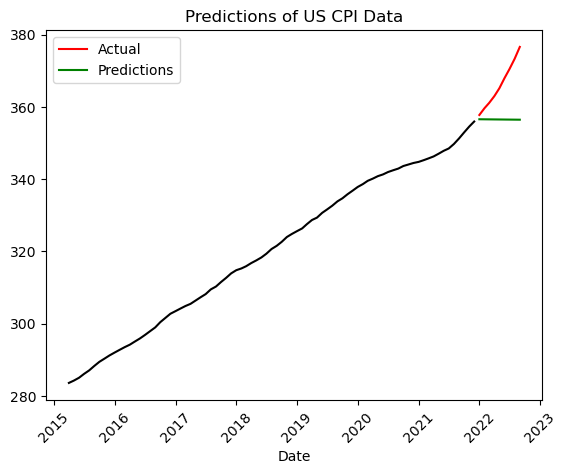

In [71]:
# Get predictions series
y_pred_out = y_pred_df["Predictions"]

# Plot
plt.plot(train, color = 'black')
plt.plot(test, color = 'red', label = 'Actual')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions of US CPI Data")
plt.legend();

**Question 2.1:** Why does the predictions look almost constant?

1. Because ARMA is a bad model for this time series
2. Because we did not give ARMA a reasonable set of orders (i.e. p and q)
3. Because the data is too volatile to predict

Assign the number corresponding to your answer to `q2_1` below.

In [72]:
q2_1 = 2

In [73]:
grader.check("q2_1")

q2_1 results: All test cases passed!

We can also compute the loss of this model. 

In [74]:
arma_rmse = np.sqrt(mean_squared_error(test["CPI"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  11.370079226743105


### Autoregressive Integrated Moving Average (ARIMA)

The notation ARIMA(p, d, q) refers to the model with p autoregressive terms with d degree of differencing and q moving-average terms. 

$$X_t' = c + \underbrace{\phi_1 X_{t-1}' + \phi_2 X_{t-2}' + \cdots + \phi_p X_{t-p}'}_{AR(p)} + \underbrace{\theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}}_{MA(q)} + \varepsilon_t $$ 

where $y_t'$ is the differenced series (it may have been differenced more than once).

**Difference between ARMA and ARIMA**: The only difference is the “integrated” part. Integrated refers to the number of times needed to difference a series in order to achieve stationarity, which is required for ARMA models to be valid. So ARMA is a special case of ARIMA with $d = 0$. ARIMA models are widely used for real life time series analysis since most times series data are non stationary and need differencing.

Here's a summary table for the relationship between the ARIMA model and the models discussed. 

| Model | ARIMA(p, d, q) |
| ----------- | ----------- |
| White noise | ARIMA(0,0,0) |
| Random walk | ARIMA(0,1,0) with no constant |
| Random walk with drift | ARIMA(0,1,0) with a constant |
| Autoregression (AR(p)) | ARIMA(p,0,0) |
| Moving average (MA(q)) | ARIMA(0,0,q) |
| Autoregressive Moving Average (ARMA(p,q)) | ARIMA(p,0,q) |

Now let's try fit our data using $\text{ARIMA}(1, 1, 1)$. 

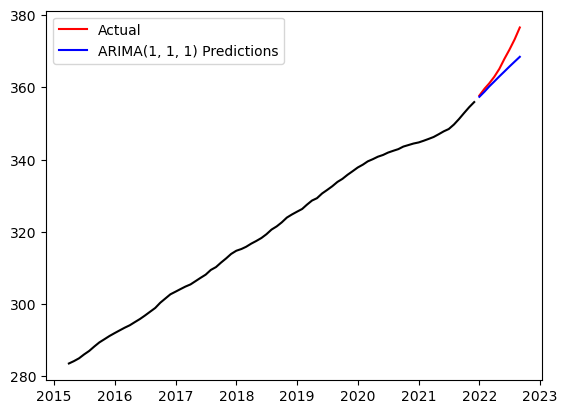

In [75]:
ARIMAmodel_naive = ARIMA(y_train, order = (1, 1, 1))
ARIMAmodel_naive = ARIMAmodel_naive.fit()

y_pred = ARIMAmodel_naive.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel_naive.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(train, color = "black")
plt.plot(test, color = "red", label = 'Actual')
plt.plot(y_pred_out, color='blue', label = 'ARIMA(1, 1, 1) Predictions')
plt.legend();

In [76]:
arima_naive_rmse = np.sqrt(mean_squared_error(test["CPI"].values, y_pred_df["Predictions"]))
print("RMSE: ",arima_naive_rmse)

RMSE:  4.025701935270436


After adding $d=1$ differencing, the predictions look much better than before!

However, the ARIMA model for time series analysis and forecasting can be tricky to configure.

There are 3 parameters (p, d and q) that require estimation by iterative trial and error from reviewing diagnostic plots and using 40-year-old heuristic rules. Usually we will find optimal parameters with ACF, PACF plots, and BIC/AIC information criteria or simply do a grid search, but we will not go into depth about these topics here. If you are interested, you can learn more about this in Stat 153. 

<!-- BEGIN QUESTION -->

**Question 2.2:** Let's find some better parameters using trial and error. Try some combinations of p, d and q and see what is the result of the predictions. We will manually grade this question, and in order to recieve full credit, you must achieve an RMSE of less than 3.5 and a plot of your predictions vs the actual values must be shown.

Hint: Think about what does p, d, q mean in the ARIMA model. 

RMSE:  3.1620364048099856


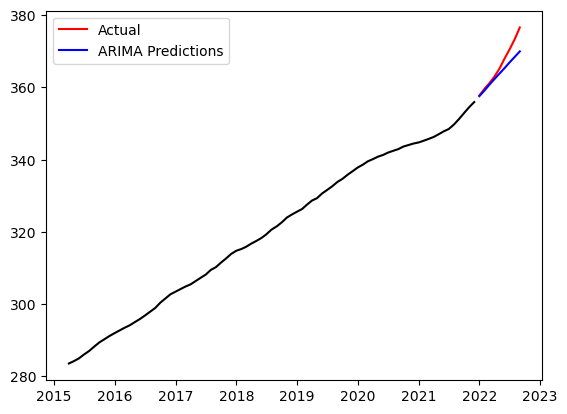

In [77]:

ARIMAmodel = ARIMA(y_train, order=(2, 2, 5)) # specify the model
ARIMAmodel = ARIMAmodel.fit() # fit the model


y_pred_arima = ARIMAmodel.get_forecast(len(test.index)) # generate predictions
y_pred_arima_df = y_pred_arima.conf_int(alpha = 0.05) 
y_pred_arima_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_arima_df.index = test.index
y_pred_arima_out = y_pred_arima_df["Predictions"] 

arima_rmse = np.sqrt(mean_squared_error(test["CPI"].values, y_pred_arima_out))
print("RMSE: ",arima_rmse)

plt.plot(train, color = "black") # plot
plt.plot(test, color = "red", label = 'Actual')
plt.plot(y_pred_arima_out, color='blue', label = 'ARIMA Predictions')
plt.legend();

<!-- END QUESTION -->

However, in the real world when we don't know the future values, such tuning can lead to overfitting. So we need to be aware of the [bias-variance tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229) when tuning our time series model. 

---
## The below subpart is for Extra Credit. 

<div class="alert alert-info">

***Note:*** You have now **finished** all the coding that is required for this lab - congratulations! The below parts are purely optional, if you wish to extend your knowledge further. If you do not wish to finish these parts, feel free to scroll down, fill out the survey and then submit the lab!

Don't worry about not passing the following test on gradescope. 

</div>

We want to combine both time series so that we can analyze them together. However, we notice that the `DATE` column has different values. ZORI is measured on the 31st of each month, while CPI is measured on the 1st day of each month. For our purposes, we can combine the two by using the `DATE` index from the US CPI and using the 1st day of the month.

In [78]:
combined = pd.concat([zillow.reset_index(drop=True), usCPI.reset_index(drop=True)], axis=1)
combined.index = usCPI.index
combined

,ZORI,CPI
DATE,,
2015-04-01,1370.301806,283.598
2015-05-01,1381.971304,284.245
2015-06-01,1392.38909,285.031
2015-07-01,1403.203509,286.090
2015-08-01,1408.901384,287.068
...,...,...
2022-05-01,1997.73126,365.116
2022-06-01,2019.752839,367.927
2022-07-01,2044.662959,370.448


### Visual Comparison

We can try plotting this graph to see if we can find anything interesting.

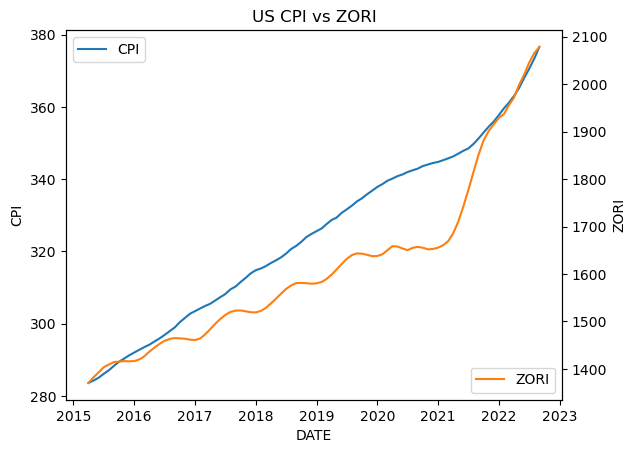

In [79]:
sns.lineplot(data=combined, x="DATE", y="CPI", color='tab:blue', label='CPI')
ax2 = plt.twinx()
sns.lineplot(data=combined, x="DATE", y="ZORI", color='tab:orange', ax=ax2, label='ZORI')
plt.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.title("US CPI vs ZORI");

#### Logging Our Data

We can try logging our data to make them easier to compare.

**Question 3.1:** Take the natural log for `CPI` and `ZORI` and store the results in new columns `log CPI` and `log ZORI`. Then make a plot similar to the one above. 

Hint: You may want to convert both column `ZORI` and `CPI` to `float64` before taking the natural log. 

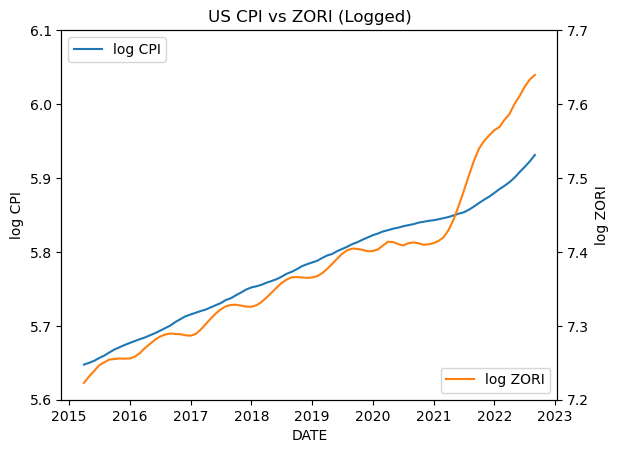

In [80]:
combined["CPI"] = combined["CPI"].astype("float64")
combined["log CPI"] = np.log(combined["CPI"])
combined["ZORI"] = combined["ZORI"].astype("float64")
combined["log ZORI"] = np.log(combined["ZORI"])

sns.lineplot(data=combined,x=combined.index,y="log CPI", color='tab:blue', label='log CPI')
plt.ylim([5.6, 6.1])
plt.legend(loc='upper left')

ax2 = plt.twinx()
sns.lineplot(data=combined,x=combined.index,y="log ZORI", color='tab:orange', ax=ax2, label='log ZORI')
ax2.set_ylim([7.2, 7.7])
ax2.legend(loc='lower right')
plt.title("US CPI vs ZORI (Logged)");

In [81]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Congrats on making it to the end of the lab!**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [82]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q2_1 results: All test cases passed!

    q3_1 results: All test cases passed!
